In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

# Ex. 1 Please load this Clinic data from https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv and perform preprocessing as follows :

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv')
df

,hn,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
0,2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2,2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
4,2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
1719,3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1720,2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1721,3302539,44,3,0.0,0.0,0,1,1.0,0.0,5.0,...,15.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 1.1Set index of data to hn numbers

In [3]:
df = df.set_index('hn')
df

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,4.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,2.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,1.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 1.2 Remove missing values

In [4]:
df_clean = df
df_clean.isnull().any()

age           False
parity        False
hiv            True
menopaus       True
disease       False
surgery       False
conization     True
OPDsize        True
appearance     True
stage          True
pchemo         True
Wardsize       True
finalhisto     True
nodeyiel       True
RHlvsi         True
depth          True
size           True
utmet          True
vgmargin       True
vgmet          True
pelvicme       True
pmmet          True
adnmet         True
dtype: bool

In [5]:
df_clean = df_clean.dropna(0,'any')
df_clean.isnull().any()

age           False
parity        False
hiv           False
menopaus      False
disease       False
surgery       False
conization    False
OPDsize       False
appearance    False
stage         False
pchemo        False
Wardsize      False
finalhisto    False
nodeyiel      False
RHlvsi        False
depth         False
size          False
utmet         False
vgmargin      False
vgmet         False
pelvicme      False
pmmet         False
adnmet        False
dtype: bool

In [6]:
df_clean

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2450167,67,5,0.0,1.0,1,0,0.0,3.0,2.0,4.0,...,34.0,38.0,3.0,3.7,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,57,2,0.0,1.0,1,1,1.0,0.0,5.0,4.0,...,18.0,0.0,3.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
3813471,42,2,0.0,0.0,1,0,0.0,3.0,2.0,4.0,...,33.0,999.0,3.0,2.7,0.0,2.0,1.0,1.0,1.0,0.0
3812935,53,1,0.0,1.0,1,0,1.0,0.0,5.0,4.0,...,17.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# 1.3 Remove these unnecessary columns hiv, size, utmet, vgmet, surgery, pchemo

In [7]:
df_clean = df_clean.drop('hiv',1)
df_clean = df_clean.drop('size',1)
df_clean = df_clean.drop('utmet',1)
df_clean = df_clean.drop('vgmet',1)
df_clean = df_clean.drop('surgery',1)
df_clean = df_clean.drop('pchemo',1)
df_clean.columns

Index(['age', 'parity', 'menopaus', 'disease', 'conization', 'OPDsize',
       'appearance', 'stage', 'Wardsize', 'finalhisto', 'nodeyiel', 'RHlvsi',
       'depth', 'vgmargin', 'pelvicme', 'pmmet', 'adnmet'],
      dtype='object')

In [8]:
df_clean

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,38,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,55,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,67,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,57,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,42,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,53,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


# 1.4 Change age into 2 values 'Young' (age <= 20) and 'Old' (age > 20)

In [9]:
df_clean['age'] = df_clean['age'] <= 20
df_clean['age'] = df_clean['age'].replace(True,'Young').replace(False,'Old')
df_clean

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,Old,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,Old,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


# 1.5 Separate data into groups based on pmmet values

In [11]:
df_pm = df_clean.groupby('pmmet')
df_pm.describe()

parity                                               menopaus            \
       count      mean       std  min  25%  50%  75%   max    count      mean   
pmmet                                                                           
0.0    803.0  2.066002  1.259132  0.0  1.0  2.0  2.0  13.0    803.0  0.301370   
1.0    232.0  2.073276  1.233996  0.0  1.0  2.0  2.0   8.0    232.0  0.362069   

       ... pelvicme      adnmet                                               
       ...      75%  max  count      mean       std  min  25%  50%  75%  max  
pmmet  ...                                                                    
0.0    ...      0.0  3.0  803.0  0.463263  0.839833  0.0  0.0  0.0  0.0  2.0  
1.0    ...      1.0  1.0  232.0  0.331897  0.725073  0.0  0.0  0.0  0.0  2.0  

[2 rows x 120 columns]

# 1.6 for each group, randomly choose 10 data


In [12]:
df_pm_random = df_clean.groupby('pmmet').sample(10)
df_pm_random.sort_values(by = ['pmmet'])

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
3232982,Old,2,1.0,1,1.0,0.0,5.0,3.0,0.0,1.0,28.0,999.0,2.0,0.0,0.0,0.0,0.0
2639488,Old,1,0.0,0,0.0,5.0,1.0,5.0,4.5,1.0,28.0,7.0,3.0,1.0,0.0,0.0,0.0
2775808,Old,3,0.0,1,0.0,0.0,5.0,4.0,0.0,1.0,37.0,0.0,2.0,0.0,0.0,0.0,0.0
2752231,Old,2,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,24.0,3.0,3.0,0.0,0.0,0.0,0.0
2813452,Old,2,1.0,1,0.0,4.0,1.0,6.0,5.0,3.0,29.0,9.0,3.0,0.0,0.0,0.0,0.0
2846918,Old,1,0.0,0,0.0,3.0,2.0,4.0,3.0,1.0,32.0,7.0,3.0,0.0,0.0,0.0,2.0
3271290,Old,1,1.0,0,1.0,0.0,5.0,4.0,0.0,3.0,29.0,2.0,3.0,2.0,0.0,0.0,0.0
3240445,Old,2,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,39.0,0.0,1.0,0.0,0.0,0.0,0.0
2965948,Old,2,1.0,1,1.0,0.0,5.0,1.0,0.0,1.0,23.0,0.0,1.0,0.0,0.0,0.0,0.0


# Ex. 2 P Please explore this dataset and report at least 5 facts about this dataset

In [13]:
df_clean.columns

Index(['age', 'parity', 'menopaus', 'disease', 'conization', 'OPDsize',
       'appearance', 'stage', 'Wardsize', 'finalhisto', 'nodeyiel', 'RHlvsi',
       'depth', 'vgmargin', 'pelvicme', 'pmmet', 'adnmet'],
      dtype='object')

<AxesSubplot:xlabel='pelvicme'>

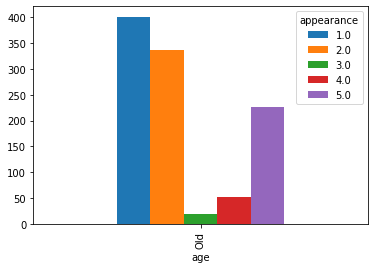

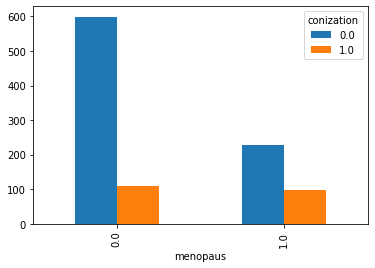

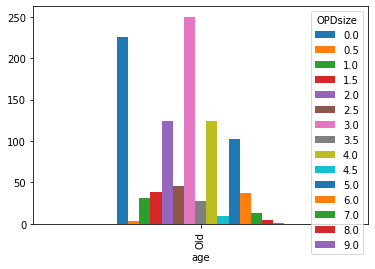

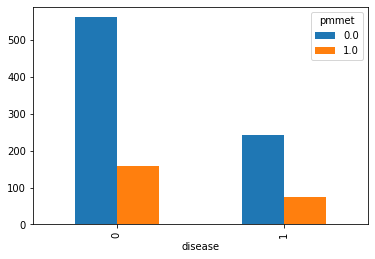

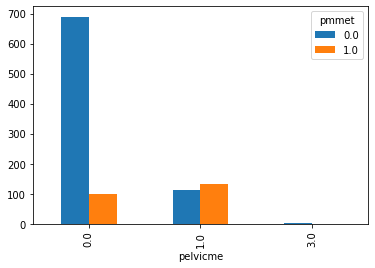

In [27]:
pd.crosstab(df_clean['age'],df_clean['appearance']).plot(kind='bar')
pd.crosstab(df_clean['menopaus'],df_clean['conization']).plot(kind='bar')
pd.crosstab(df_clean['age'],df_clean['OPDsize']).plot(kind='bar')
pd.crosstab(df_clean['disease'],df_clean['pmmet']).plot(kind='bar')
pd.crosstab(df_clean['pelvicme'],df_clean['pmmet']).plot(kind='bar')